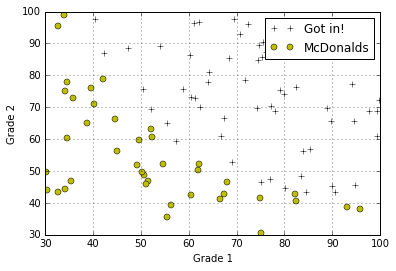

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Loadtxt adds things in format of text file in columns and rows
#can transpose with unpack=True
cols = np.loadtxt('ex2data1.txt',delimiter=',')
cols = np.transpose(np.array(cols))

x = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))

yes = np.array([x[i] for i in xrange(len(x)) if y[i] == 1])
no = np.array([x[i] for i in xrange(len(x)) if y[i] == 0])

def plotData():
    plt.plot(yes[:,0],yes[:,1],'k+',label='Got in!')
    plt.plot(no[:,0],no[:,1],'yo',label='McDonalds')
    plt.xlabel('Grade 1')
    plt.ylabel('Grade 2')
    plt.legend()
    plt.grid(True)
    
plotData()

#This is for next part, so I can rerun each cell below without messing up
x = np.insert(x,0,1,axis=1)

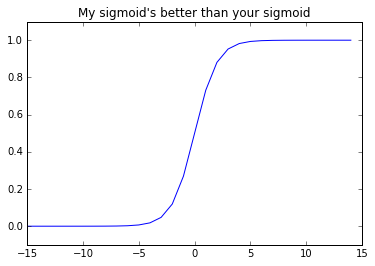

In [2]:
# Test sigmoid
import math

a = np.arange(-15,15)
b = [1./(1 + math.exp(-1*i)) for i in a]

plt.plot(a,b,'b-')
plt.ylim(-0.1,1.1)
plt.title('My sigmoid\'s better than your sigmoid')

In [3]:
def h(x,theta):
    z = -1 * np.dot(x,theta) 
    return 1./(1 + np.exp(z))  

def computeCost(theta,x,y,lam=0.):
    reg = float(lam) / (2*len(y)) * np.dot(theta[1:].T,theta[1:])
    return 1./len(y)*float(np.dot(-1*y.T,np.log(h(x,theta))) - \
           np.dot((1-y).T, np.log(1-h(x,theta)))) + reg

#def gradientDescent(x,y,theta,alpha,iterations):
#    cost = []
#    for i in xrange(iterations):
#        cost.append(computeCost(theta,x,y))
#        theta -= alpha/len(y) * (np.dot((h(x,theta) - y).T,x )).T #.reshape(len(theta),1)
#    return theta, cost

In [5]:
theta = np.zeros([x.shape[1],1])
iterations = 1500
alpha = 0.01

print "Initial cost ", computeCost(theta,x,y)
theta_new, cost_new = gradientDescent(x,y,theta,alpha,iterations)

Initial cost  [[ 0.69314718]]


Now need to find optimal parameters not using gradient descent
Note: fminunc not in python.  Dude on stack overflow doing the same thing was sent here:
http://docs.scipy.org/doc/scipy-0.10.0/reference/tutorial/optimize.html

So I'll use this function as well

In [6]:
from scipy.optimize import fmin, minimize

new_theta = np.zeros([len(x[1]),1])
xopt = fmin(computeCost, x0 = new_theta, args=(x,y),maxiter=400)#, xtol=1e-8)

#Now check cost function
print "This better match fmin report above: ", computeCost(xopt,x,y)
#print "Optimal things: ", xopt[0], xopt[1]

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287
This better match fmin report above:  0.20349770159


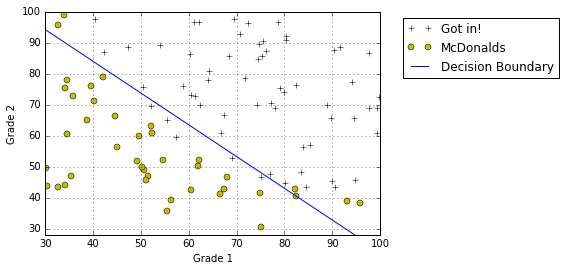

In [7]:
from pylab import meshgrid, imshow

opt_x1 = np.arange(30,100,5)
#Decision boundary occurs when the hypoth = 0; ie, when x0 + x1t1 + x2t2 = 0  
opt_y = [ -1./xopt[2]*(xopt[0] + xopt[1]*opt_x1[i]) for i in xrange(len(opt_x1)) ]

plotData()
plt.plot(opt_x1,opt_y,label="Decision Boundary")
plt.ylim(28,100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [8]:
#Will student get in?
exs = np.array([1, 45, 85 ])
print("Student has {0:.2f}% chance of admission".format(h(exs,xopt)*100))

Student has 77.63% chance of admission


In [9]:
# If hypoth > 0.5, we consider it correct. 
def accuracy(xx,xxopt):
    temp = np.array(np.round(h(xx,xxopt)))
    
    acc = 0
    for i in xrange(len(temp)):
        if temp[i] == y[i]:
            acc += 1
    return float(acc)/len(xx)        
    #Can;t get not operator to work in an expected way; moving on
    #return np.cumsum(~(temp^y))[-1]
    
print "Accurancy of hypoth: ", accuracy(x,xopt)*100,"%"

Accurancy of hypoth:  89.0 %


2) Regularized Logistic Regression

In [10]:
cols2 = np.loadtxt('ex2data2.txt',delimiter=',')
cols2 = np.transpose(np.array(cols2))

#print cols2
x2 = np.transpose(np.array(cols2[:-1]))
y2 = np.transpose(np.array(cols2[-1:]))
#print x2[:,0]

yes2 = np.array([x2[i] for i in xrange(len(x2)) if y2[i] == 1])
no2  = np.array([x2[i] for i in xrange(len(x2)) if y2[i] == 0])
print x2.shape

def plotData2():
    plt.plot(yes2[:,0],yes2[:,1],'k+',label='y=1')
    plt.plot(no2[:,0],no2[:,1],'yo',label='y=0')
    plt.xlabel('Microchip Test1')
    plt.ylabel('Microchip Test2')
    plt.legend()
    plt.grid(True)

(118, 2)


In [11]:
# OK...now build the 28 dim vector
# For the sake of time, found this website to build it:
# http://aimotion.blogspot.com/2011/11/machine-learning-with-python-logistic.html
def map_feature(x1, x2):
    x1.shape = (x1.size, 1)
    x2.shape = (x2.size, 1)
    degree = 6
    out = np.ones(shape=(x1[:, 0].size, 1))

    m, n = out.shape
    
    for i in range(1, degree + 1):
        for j in range(i + 1):
            r = (x1 ** (i - j)) * (x2 ** j)
            out = np.append(out, r, axis=1)

    return out

In [12]:
#Compute cost using lambda = 0
x28 = map_feature(x2[:,0],x2[:,1])
theta2 = np.zeros([x28.shape[1],1])

print("The cost is {0:.3f}".format(float(computeCost(theta2,x28,y2,0))))

The cost is 0.693


2.3) Cost function and gradient

In [13]:
from matplotlib import cm

#Find + plot decision boundary
theta_0 = np.zeros([x28.shape[1],1])

#theta_db = fmin(computeCost2,x0=theta_0,args=(x28,y2,0),xtol=0.0001,ftol=0.0001,maxiter=10000)#, xtol=1e-8)
#print theta_db
#Getting this warning for fmin function : "Warning: Maximum number of iterations has been exceeded."
#Try playing around with xtol + ftol, but was unable to make function converge
#Try optimize function minimize
#http://stackoverflow.com/questions/13534788/scipy-optimize-has-confusing-behavior

def getContours(theta_0,xparam,yparam,lamb):
    theta_db = minimize(computeCost,theta_0,args=(xparam,yparam,lamb))
    theta_db = np.array([theta_db.x])

    x1_loop = np.arange(-1.,1.5,.1)
    x2_loop = np.arange(-1.,1.5,.1)
    y_loop = np.zeros((len(x1_loop),len(x2_loop)))

    for i in xrange(len(x1_loop)):
        for j in xrange(len(x2_loop)):
            x_db = map_feature(np.array([x1_loop[i]]),np.array([x2_loop[j]]))
            
            #The example plotDecisionBoundary uses this dot product
            #I don't understand why we're not using the hypothesis
            y_loop[i][j] = np.dot(theta_db,x_db.T) #h(x_db,theta_db)
    X1, X2 = meshgrid(x1_loop,x2_loop)
    CS = plt.contour(x1_loop, x2_loop, y_loop,[0])

    plt.clabel(CS,fmt='lambda=%d'%lamb)               
    plt.title('Decision Boundary for Lambda=%d' % lamb)

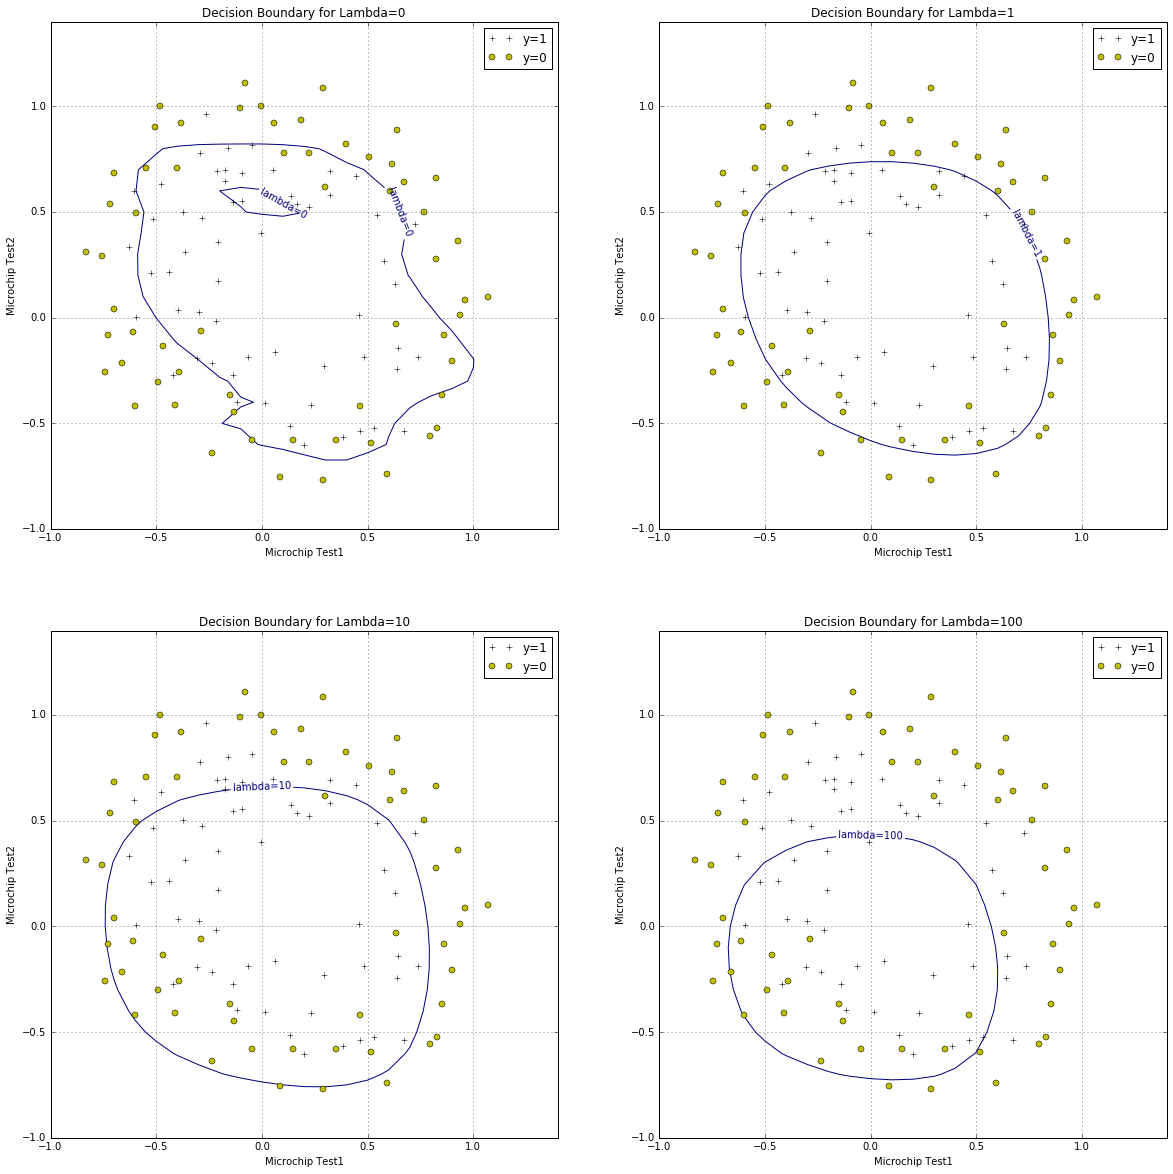

In [14]:
# Hm. Don't quite understand presence of multiple contours
# Also noticing that this contour is reshaping as I run in this 
# cell several times in a row...
plt.figure(figsize=(20,20))
plt.subplot(221)
plotData2()
getContours(theta_0,x28,y2,0.)

plt.subplot(222)
plotData2()
getContours(theta_0,x28,y2,1.)

plt.subplot(223)
plotData2()
getContours(theta_0,x28,y2,10.)

plt.subplot(224)
plotData2()
getContours(theta_0,x28,y2,100.)